# Model-training & analysis

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import smogn
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, plot_confusion_matrix, f1_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Data

In [2]:
df = pd.read_csv('../Data/data_final.csv')

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011976 entries, 0 to 1011975
Data columns (total 42 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Rating                      1011976 non-null  float64
 1   Rating Count                1011976 non-null  float64
 2   Installs                    1011976 non-null  int64  
 3   Free                        1011976 non-null  float64
 4   Size_kb                     1011976 non-null  float64
 5   Last Updated                1011976 non-null  int64  
 6   Ad Supported                1011976 non-null  float64
 7   In App Purchases            1011976 non-null  float64
 8   Price_USD                   1011976 non-null  float64
 9   App-age                     1011976 non-null  float64
 10  Category_Action             1011976 non-null  int64  
 11  Category_Adventure          1011976 non-null  int64  
 12  Category_Arcade             1011976 non-null  int64  
 1

In [7]:
df.head()

,Rating,Rating Count,Installs,Free,Size_kb,Last Updated,Ad Supported,In App Purchases,Price_USD,App-age,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Content Rating_Everyone,Content Rating_Other
0,3.6,2848.0,100000,1.0,2700.0,736469,0.0,0.0,0.0,7.769863,...,0,0,0,0,0,0,0,0,1,0
1,4.2,665.0,50000,1.0,29000.0,737751,0.0,0.0,0.0,4.649315,...,0,0,0,0,0,0,0,0,1,0
2,3.5,377.0,10000,1.0,12000.0,737735,0.0,0.0,0.0,2.284932,...,0,0,0,0,0,0,0,0,1,0
3,4.4,3346.0,100000,1.0,9400.0,737332,0.0,1.0,0.0,3.353425,...,0,0,0,0,0,0,0,0,1,0
4,3.3,1141.0,100000,1.0,3300.0,737601,1.0,0.0,0.0,1.345205,...,0,0,0,0,0,0,1,0,1,0


## Visualisations

In [44]:
vis = pd.read_csv('../Data/data_vis.csv')

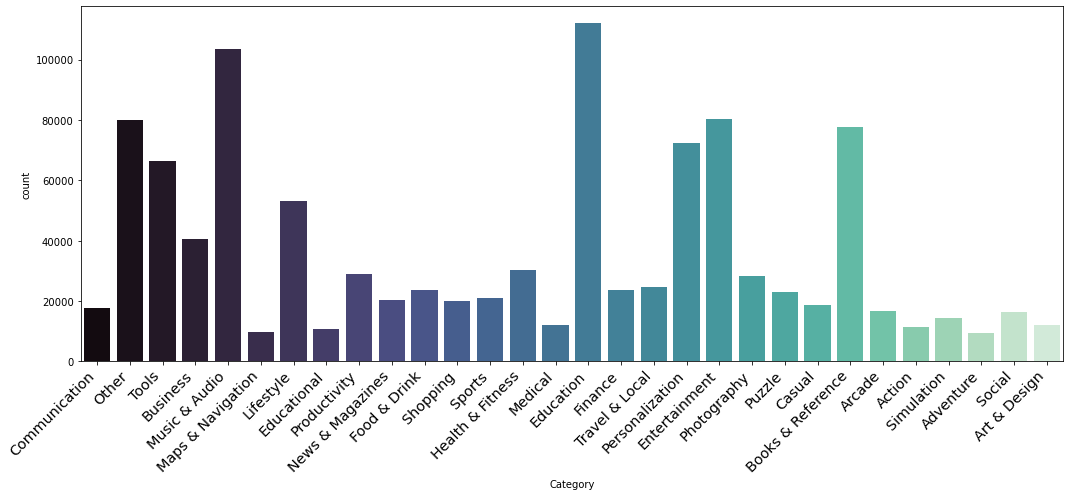

In [46]:
plt.figure(figsize=(15,7))
chart = sns.countplot(
    data=vis,
    x='Category',
    palette='mako'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()
plt.savefig('../Figures/Categories.png', dpi = 900)
plt.show()

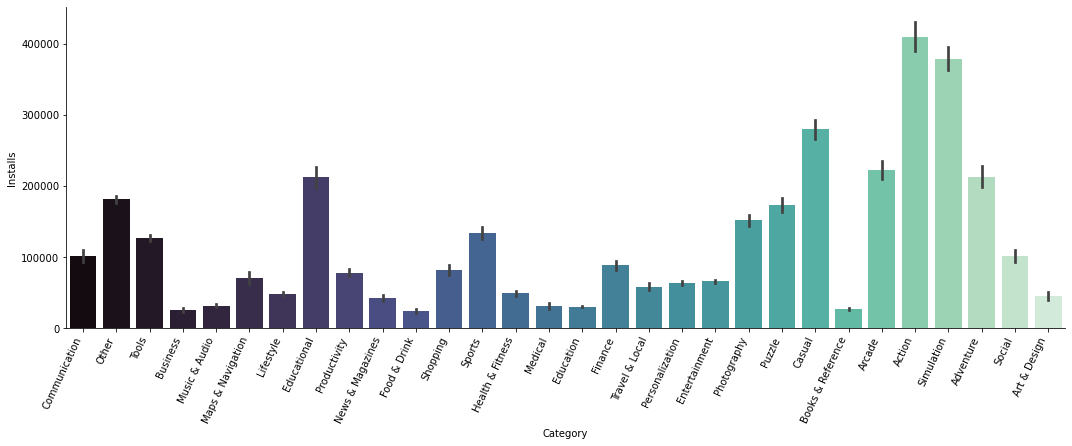

In [22]:
chart = sns.catplot(
    data=vis,
    x='Category',
    kind='bar',
    palette='mako',
    y='Installs',
    aspect=3,
    height=5
)
chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.show()

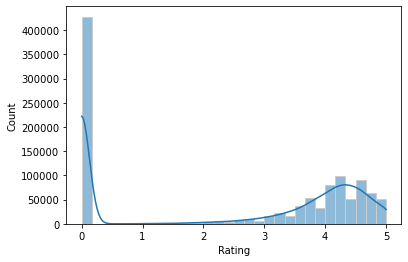

In [26]:
sns.histplot(data=vis, x='Rating', bins=30, palette="mako",kde=True, edgecolor=".8")
plt.show()

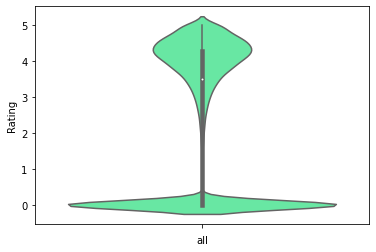

In [43]:
vis['all'] = ""
ax = sns.violinplot(x="all", y= 'Rating',
                    data=vis, color = '#53fca1',aspect=1,height=5)
plt.savefig('../Figures/Rating_distribution.png')
plt.show()

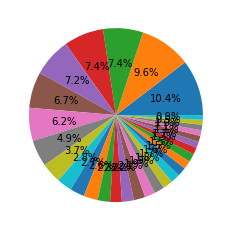

In [34]:
all_data = vis['Category'].value_counts()

plt.pie(all_data, autopct='%1.1f%%')
plt.show()

## Rating

In [ ]:
# drop 0s
# class inbalance > downsampling? (manually (sample function, tts > train set downsampling, not testset!) or lib)

<AxesSubplot:>

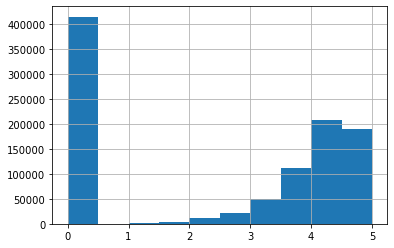

In [8]:
df['Rating'].hist() # unbalanced ds  (drop all 0s and work with the rest)

In [9]:
df_rating = df[df.Rating != 0]

<AxesSubplot:>

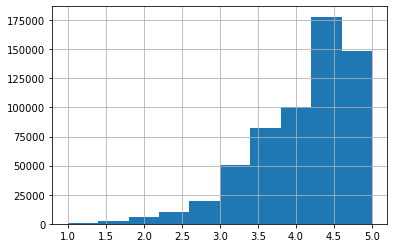

In [10]:
df_rating['Rating'].hist()

In [20]:
df_rating['Rating'].unique()

array([3.6, 4.2, 3.5, 4.4, 3.3, 3.1, 3.2, 2.8, 4.3, 4.1, 3.7, 3.9, 4. ,
       4.7, 3.8, 3.4, 4.5, 2.6, 4.6, 4.8, 3. , 2.7, 2. , 2.3, 2.2, 5. ,
       2.9, 2.5, 4.9, 2.4, 1.5, 1.9, 2.1, 1.8, 1.6, 1.7, 1.4, 1.1, 1.2,
       1.3, 1. ])

In [41]:
df_rating = df_rating.reset_index()

In [42]:
df_rating.drop(['index'], axis = 1, inplace = True)

## Train Test split

In [ ]:
# 80/20%

In [18]:
y = df_rating['Rating']
X = df_rating.drop('Rating',axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [82]:
#with StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scale, y_train)

y_pred = reg.predict(X_test_scale)
y_test_predict= reg.predict(X_test)

print('R2 Score:', round(r2_score(y_test, y_pred), 5))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 5))
print('CV Score:', round(cross_val_score(reg, X, y, cv=8).mean(), 5))

R2 Score: 0.05631
RMSE: 0.63908
CV Score: 0.04119


In [83]:
#with RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scale, y_train)

y_pred = reg.predict(X_test_scale)
y_test_predict= reg.predict(X_test)

print('R2 Score:', round(r2_score(y_test, y_pred), 5))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 5))
print('CV Score:', round(cross_val_score(reg, X, y, cv=8).mean(), 5))

R2 Score: 0.05633
RMSE: 0.63908
CV Score: 0.04119


In [84]:
#with MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_scale, y_train)

y_pred = reg.predict(X_test_scale)
y_test_predict= reg.predict(X_test)

print('R2 Score:', round(r2_score(y_test, y_pred), 5))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 5))
print('CV Score:', round(cross_val_score(reg, X, y, cv=8).mean(), 5))

R2 Score: 0.05622
RMSE: 0.63911
CV Score: 0.04119


### Random Forest Regressor

In [75]:
def performance_metric_2(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [77]:
train_r2_score = []
test_r2_score = []
max_depths = [1,3,5,7,9,11]

#for loop
for k in max_depths:
    RFR = RandomForestRegressor(max_depth=k)
    RFR.fit(X_train, y_train)
    y_predict = RFR.predict(X_train)
    y_test_predict= RFR.predict(X_test)
    train_r2_score.append(performance_metric_2(y_train, y_predict))
    print('k =', k, '\ntrain_r2 =', performance_metric_2(y_train, y_predict))
    test_r2_score.append(r2_score(y_test, y_test_predict))
    print('test_r2 =', r2_score(y_test, y_test_predict))
    print('\n')

k = 1 
train_r2 = 0.04273874415604262
test_r2 = 0.04314626439042912


k = 3 
train_r2 = 0.0727410478177396
test_r2 = 0.07212485679716996


k = 5 
train_r2 = 0.09730384226639399
test_r2 = 0.09621734175132757


k = 7 
train_r2 = 0.12133125241464116
test_r2 = 0.118164230487106


k = 9 
train_r2 = 0.1493910562798766
test_r2 = 0.14044596746543392


k = 11 
train_r2 = 0.18151099468771548
test_r2 = 0.16046243442549712




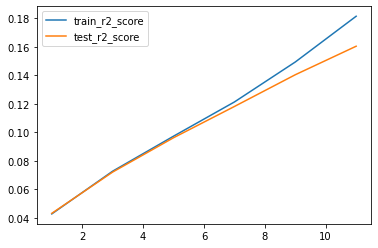

In [78]:
# Plot
plt.plot(max_depths, train_r2_score, label='train_r2_score')
plt.plot(max_depths, test_r2_score, label='test_r2_score')
plt.legend()
plt.show()

In [80]:
RFR = RandomForestRegressor(max_depth=9)
RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

print('R2 Score', round(r2_score(y_test, y_pred), 5))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 5))

R2 Score 0.14
RMSE: 0.61009


In [93]:
print('CV Score:', round(cross_val_score(RFR, X, y, cv=5).mean(), 5))

KeyboardInterrupt: 

### KNeighborsRegressor

In [94]:
#with StandartScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

Knn = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
Knn.fit(X_train_scale, y_train)

y_pred = Knn.predict(X_test_scale)

print('R2 Score:', round(r2_score(y_test, y_pred), 5))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 3))
print('CV Score:', round(cross_val_score(Knn, X, y, cv=3).mean(), 5))

R2 Score: -0.10286
RMSE: 0.691


KeyboardInterrupt: 

### Decsion Tree Regressor

In [88]:
train_r2_score = []
test_r2_score = []
max_depths = [4, 8, 10, 12]

#for loop
for k in max_depths:
    DTR = DecisionTreeRegressor(max_depth=k)
    DTR.fit(X_train, y_train)
    y_predict = DTR.predict(X_train)
    y_test_predict= DTR.predict(X_test)
    train_r2_score.append(performance_metric_2(y_train, y_predict))
    print('k =', k, '\ntrain_r2 =', performance_metric_2(y_train, y_predict))
    test_r2_score.append(r2_score(y_test, y_test_predict))
    print('test_r2 =', r2_score(y_test, y_test_predict))
    print('\n')

k = 4 
train_r2 = 0.08594777616512161
test_r2 = 0.0847808194281452


k = 8 
train_r2 = 0.12607803273142548
test_r2 = 0.11932975620823727


k = 10 
train_r2 = 0.15342272155155667
test_r2 = 0.13514594492635634


k = 12 
train_r2 = 0.182655607340802
test_r2 = 0.1421599290339749




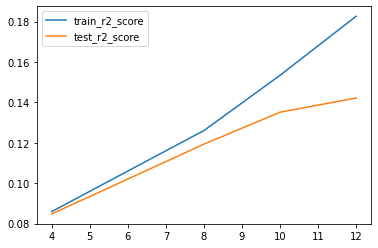

In [89]:
# Plot

plt.plot(max_depths, train_r2_score, label='train_r2_score')
plt.plot(max_depths, test_r2_score, label='test_r2_score')
plt.legend()
plt.show()

In [92]:
DTR = DecisionTreeRegressor(max_depth=10) 
DTR.fit(X_train, y_train)

y_pred_train = dtr_model.predict(X_train)
y_pred_test  = dtr_model.predict(X_test)

print('R2 Score:', round(r2_score(y_test, y_pred), 5))
print('RMSE:', round(mean_squared_error(y_test, y_pred, squared=False), 5))
print('CV Score:', round(cross_val_score(DTR, X, y, cv=5).mean(), 5))

R2 Score: 0.05622
RMSE: 0.63911
CV Score: 0.11082
